IMPORTING PACKAGE


In [ ]:
import pandas as pd
import numpy as np

LOADING    FILE


In [ ]:
data=pd.read_csv("/content/india_housing_prices.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              200000 non-null  int64  
 1   State                           200000 non-null  object 
 2   City                            200000 non-null  object 
 3   YearBuilt                       200000 non-null  int64  
 4   BHK                             200000 non-null  int64  
 5   Property                        200000 non-null  object 
 6   Size_in_SqFt                    200000 non-null  int64  
 7   Age_of_Property                 200000 non-null  int64  
 8   Floor_No                        200000 non-null  int64  
 9   Total_Floors                    200000 non-null  int64  
 10  Nearby_Schools                  200000 non-null  int64  
 11  Nearby_Hospitals                200000 non-null  int64  
 12  Public_Transport

In [ ]:
data.shape

(200000, 24)

In [ ]:
data['City'].unique()

array(['Bangalore', 'Kolkata', 'Chennai', 'Hubli', 'Lucknow', 'Amritsar',
       'Mumbai', 'Madurai', 'Ludhiana', 'Noida', 'Coimbatore', 'Surat',
       'Ahmedabad', 'Warangal', 'Nagpur', 'Udaipur', 'Mysore', 'Durgapur',
       'Howrah', 'Hyderabad', 'Rohini', 'Jodhpur', 'Jaipur', 'Ghaziabad',
       'Vadodara', 'Dwarka', 'Jalandhar', 'Pune', 'New Delhi',
       'Nizamabad'], dtype=object)

In [ ]:
data.drop(['ID', 'Age_of_Property'], axis=1, inplace=True)

In [ ]:
data=data.dropna()

In [ ]:
from datetime import datetime

current_year = datetime.now().year
data['Age_of_Property'] = current_year - data['YearBuilt']

In [ ]:
data['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

DESCRIBING THE NULL PERCENTAGE


In [ ]:
(data.isnull().sum()/data.shape[0])*100

,0
State,0.0
City,0.0
YearBuilt,0.0
BHK,0.0
Property,0.0
Size_in_SqFt,0.0
Floor_No,0.0
Total_Floors,0.0
Nearby_Schools,0.0
Nearby_Hospitals,0.0


In [ ]:
data.isnull().mean() * 100


,0
State,0.0
City,0.0
YearBuilt,0.0
BHK,0.0
Property,0.0
Size_in_SqFt,0.0
Floor_No,0.0
Total_Floors,0.0
Nearby_Schools,0.0
Nearby_Hospitals,0.0


In [ ]:
furnishing_map = {'Furnished': 0, 'Semi-Furnished': 1, 'Unfurnished': 2}
data['Furnishing'] = data['Furnishing'].map(furnishing_map)

In [ ]:
data['Furnishing'].unique()

array([1, 0, 2])

In [ ]:
data['Public_Transport_Accessibility'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [ ]:
label_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

# Apply the mapping
data['Public_Transport_Accessibility'] = data['Public_Transport_Accessibility'].map(label_map)

In [ ]:
# Using IQR method to cap outliers
Q1 = data['Size_in_SqFt'].quantile(0.25)
Q3 = data['Size_in_SqFt'].quantile(0.75)
IQR = Q3 - Q1

# Define caps
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR

# Clip outliers
data['Size_in_SqFt'] = data['Size_in_SqFt'].clip(lower_cap, upper_cap)


CORELATION  WITH TARGET  VARIABLE

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns
correlation_with_target = data[numerical_cols].corr()['Price_in_Lakhs'].sort_values(ascending=False)
print(correlation_with_target)

Price_in_Lakhs                    1.000000
Size_in_SqFt                      0.588696
BHK                               0.135473
Nearby_Hospitals                  0.120006
Nearby_Schools                    0.093993
Public_Transport_Accessibility    0.074985
Floor_No                          0.049506
YearBuilt                         0.003343
Total_Floors                      0.002439
Age_of_Property                  -0.003343
Furnishing                       -0.157605
Name: Price_in_Lakhs, dtype: float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           200000 non-null  object 
 1   City                            200000 non-null  object 
 2   YearBuilt                       200000 non-null  int64  
 3   BHK                             200000 non-null  int64  
 4   Property                        200000 non-null  object 
 5   Size_in_SqFt                    200000 non-null  float64
 6   Floor_No                        200000 non-null  int64  
 7   Total_Floors                    200000 non-null  int64  
 8   Nearby_Schools                  200000 non-null  int64  
 9   Nearby_Hospitals                200000 non-null  int64  
 10  Public_Transport_Accessibility  200000 non-null  int64  
 11  Parking_Space                   200000 non-null  object 
 12  Security_Feature

In [ ]:
data['Public_Transport_Accessibility'].head()

,Public_Transport_Accessibility
0,0
1,0
2,2
3,2
4,1


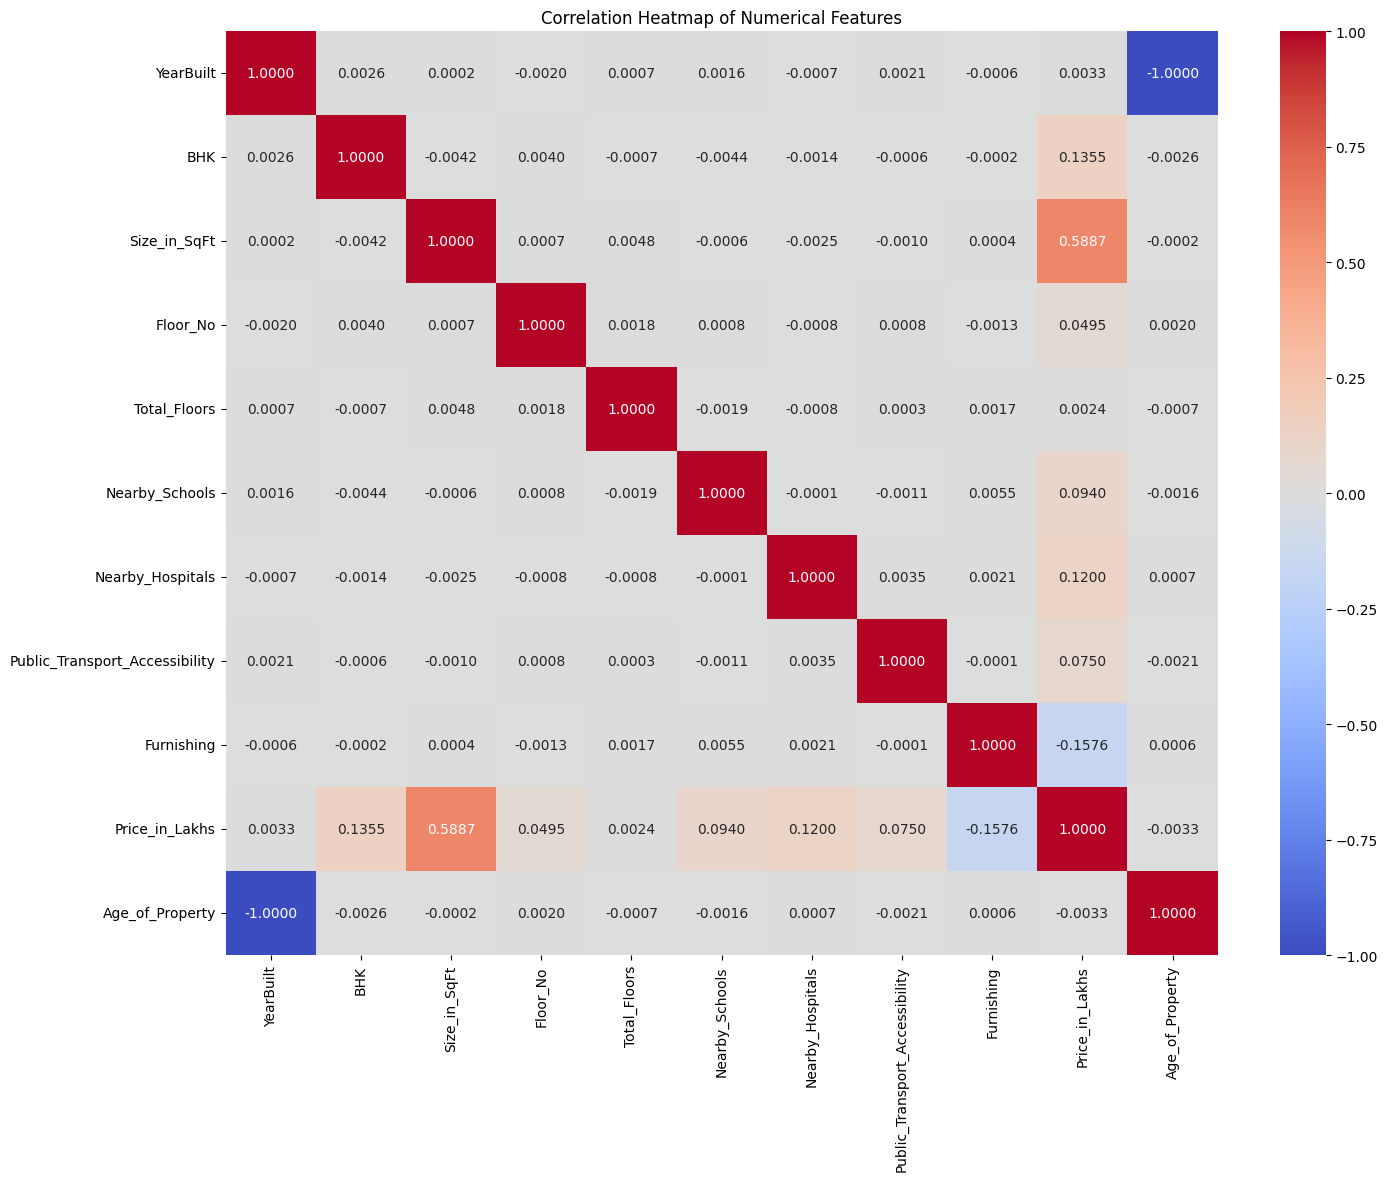

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
numerical_cols = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
olist=[]
total_column=0
for col in data.columns:
  if data[col].dtype=='object':
    olist.append(col)
    total_column=total_column+data[col].nunique()
    print(col, data[col].nunique())
print('total_column is ',total_column)
print(olist)

State 10
City 30
Property 3
Parking_Space 2
Security_Feature 2
Has_Lift 2
Garden 2
Swimming_Pool 2
Power_Backup 2
Gym 2
Club_House 2
Gated_Community 2
total_column is  61
['State', 'City', 'Property', 'Parking_Space', 'Security_Feature', 'Has_Lift', 'Garden', 'Swimming_Pool', 'Power_Backup', 'Gym', 'Club_House', 'Gated_Community']


In [ ]:
data_encoded = pd.get_dummies(data, columns=olist)
display(data_encoded.head())

,YearBuilt,BHK,Size_in_SqFt,Floor_No,Total_Floors,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Furnishing,Price_in_Lakhs,...,Swimming_Pool_No,Swimming_Pool_Yes,Power_Backup_No,Power_Backup_Yes,Gym_No,Gym_Yes,Club_House_No,Club_House_Yes,Gated_Community_No,Gated_Community_Yes
0,2011,2,2748.0,5,9,5,6,0,1,183.01,...,True,False,False,True,True,False,False,True,False,True
1,1984,5,2317.0,0,16,7,5,0,0,148.00,...,True,False,True,False,False,True,True,False,False,True
2,1994,3,2813.0,3,12,1,6,2,2,200.30,...,True,False,False,True,True,False,True,False,False,True
3,2018,3,2575.0,11,22,0,9,2,0,116.17,...,False,True,False,True,False,True,True,False,True,False
4,1986,2,2653.0,17,2,1,0,1,1,109.00,...,True,False,True,False,True,False,True,False,True,False


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 72 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   YearBuilt                       200000 non-null  int64  
 1   BHK                             200000 non-null  int64  
 2   Size_in_SqFt                    200000 non-null  float64
 3   Floor_No                        200000 non-null  int64  
 4   Total_Floors                    200000 non-null  int64  
 5   Nearby_Schools                  200000 non-null  int64  
 6   Nearby_Hospitals                200000 non-null  int64  
 7   Public_Transport_Accessibility  200000 non-null  int64  
 8   Furnishing                      200000 non-null  int64  
 9   Price_in_Lakhs                  200000 non-null  float64
 10  Age_of_Property                 200000 non-null  int64  
 11  State_Delhi                     200000 non-null  bool   
 12  State_Gujarat   

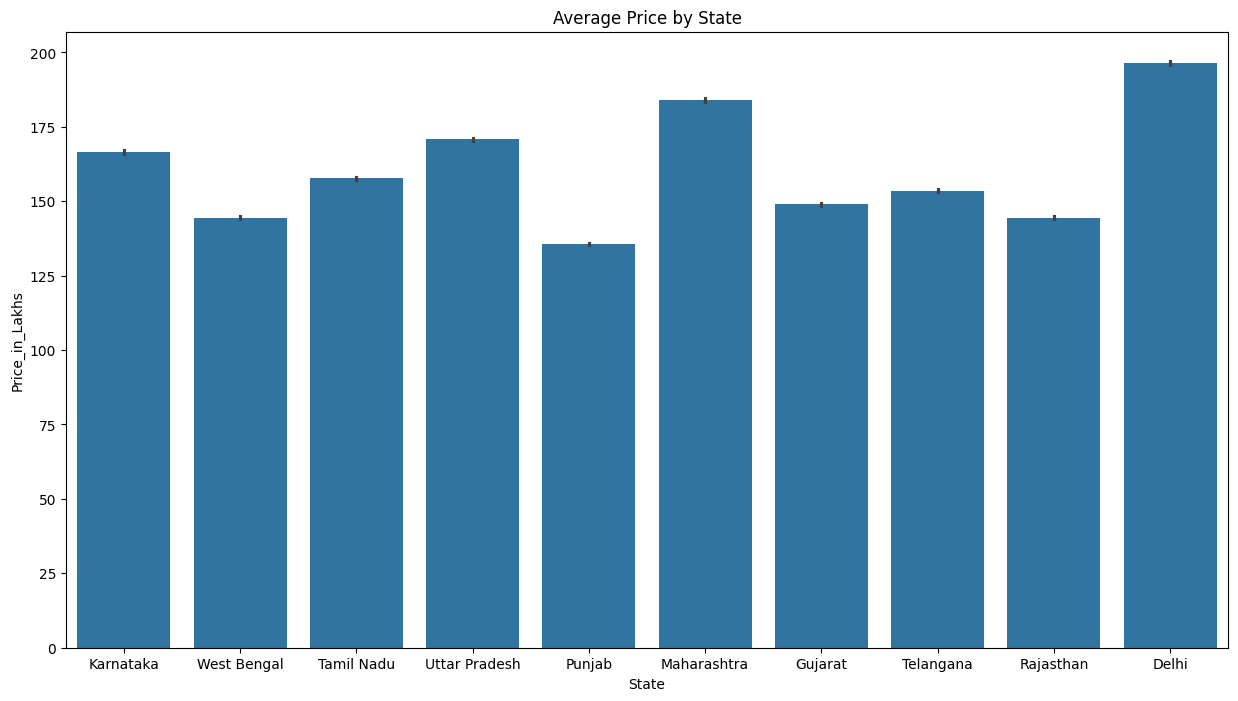

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='State', y='Price_in_Lakhs', data=data)
plt.title('Average Price by State')
plt.show()

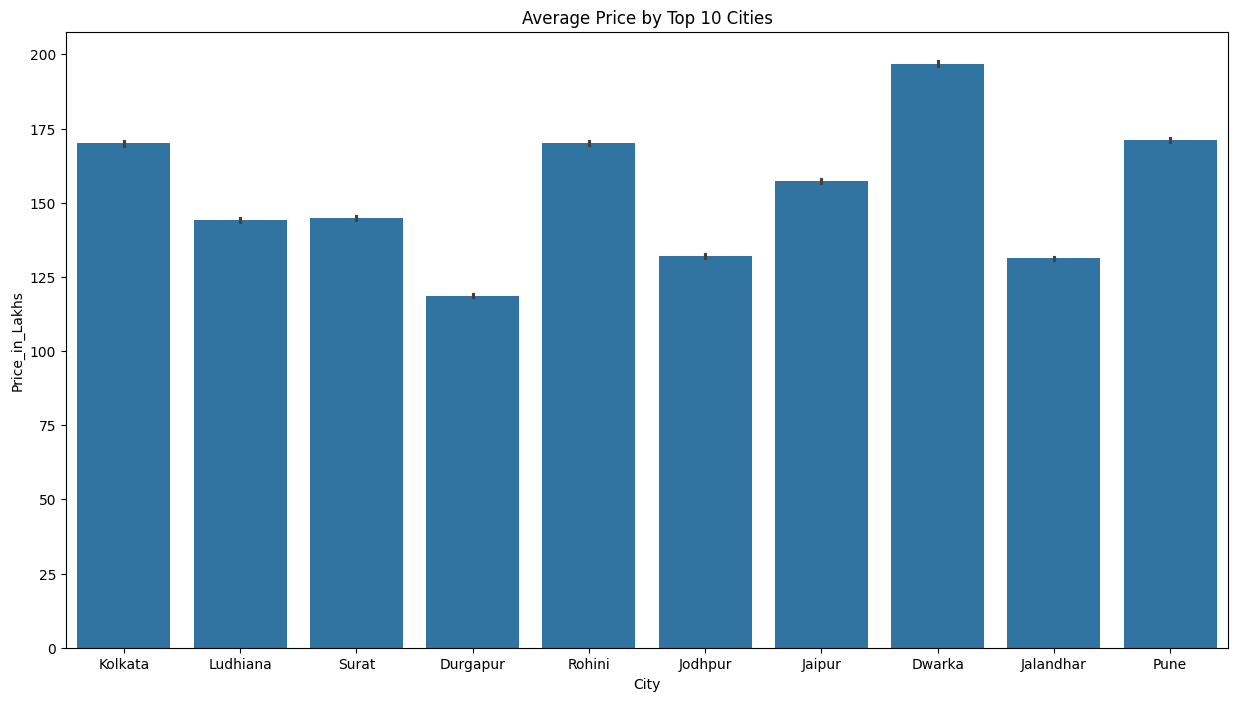

In [ ]:
top_10_cities = data['City'].value_counts().nlargest(10).index
plt.figure(figsize=(15, 8))
sns.barplot(x='City', y='Price_in_Lakhs', data=data[data['City'].isin(top_10_cities)])
plt.title('Average Price by Top 10 Cities')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           200000 non-null  object 
 1   City                            200000 non-null  object 
 2   YearBuilt                       200000 non-null  int64  
 3   BHK                             200000 non-null  int64  
 4   Property                        200000 non-null  object 
 5   Size_in_SqFt                    200000 non-null  float64
 6   Floor_No                        200000 non-null  int64  
 7   Total_Floors                    200000 non-null  int64  
 8   Nearby_Schools                  200000 non-null  int64  
 9   Nearby_Hospitals                200000 non-null  int64  
 10  Public_Transport_Accessibility  200000 non-null  int64  
 11  Parking_Space                   200000 non-null  object 
 12  Security_Feature

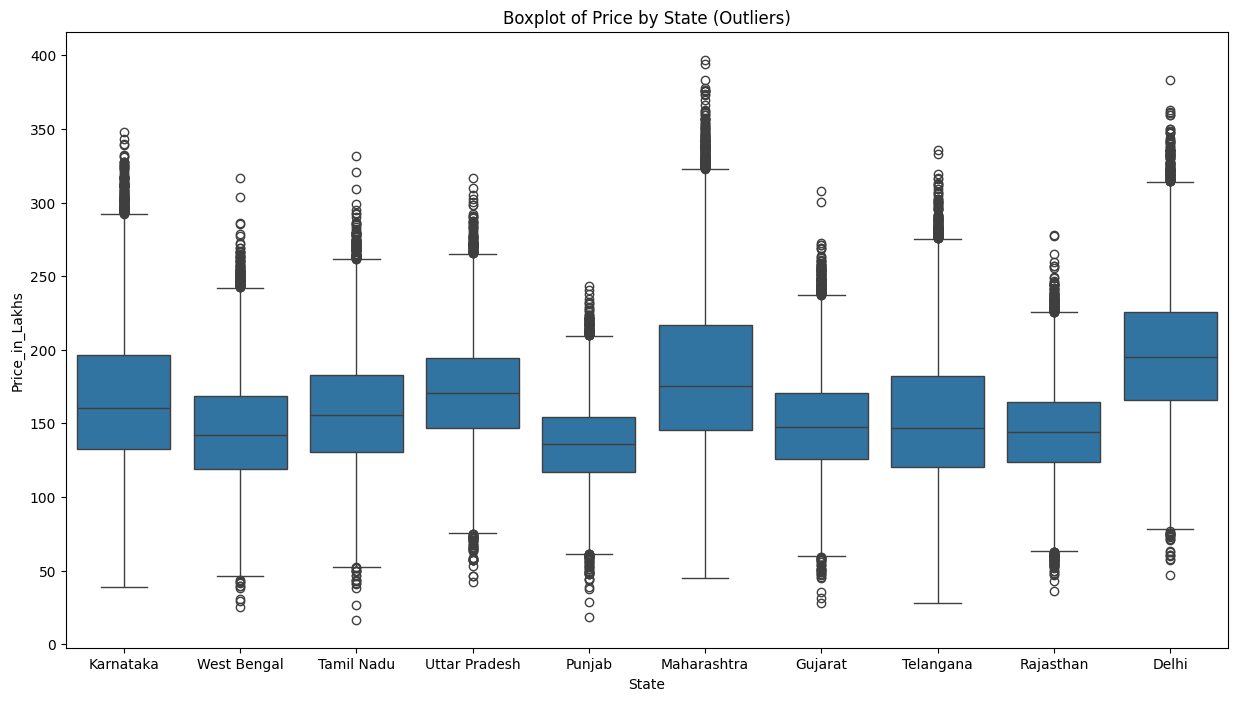

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Price_in_Lakhs', data=data)
plt.title('Boxplot of Price by State (Outliers)')
plt.show()

In [ ]:
import numpy as np
data['Log_Price'] = np.log1p(data['Price_in_Lakhs'])

In [ ]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Price_in_Lakhs', axis=1)
y = data_encoded['Price_in_Lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data has been split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data has been split into training and testing sets.
X_train shape: (160000, 71)
X_test shape: (40000, 71)
y_train shape: (160000,)
y_test shape: (40000,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")

Linear Regression Model Performance:
Mean Squared Error: 130.94553905859198
R-squared: 0.9293892920576425


In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

# XGBoost
print("XGBoost Regressor:")
xgb_model = XGBRegressor(
    random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"Train MSE: {mse_train_xgb}, Train R-squared: {r2_train_xgb}")
print(f"Test MSE: {mse_test_xgb}, Test R-squared: {r2_test_xgb}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
print(f" ARMSE: {rmse:.2f}")

print("-" * 30)

XGBoost Regressor:
Train MSE: 102.0051917236784, Train R-squared: 0.9459483781229366
Test MSE: 115.62221340190294, Test R-squared: 0.9376521995261128
 ARMSE: 10.75
------------------------------


In [ ]:

# LightGBM
print("LightGBM Regressor:")
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

y_pred_train_lgbm = lgbm_model.predict(X_train)
y_pred_test_lgbm = lgbm_model.predict(X_test)

mse_train_lgbm = mean_squared_error(y_train, y_pred_train_lgbm)
r2_train_lgbm = r2_score(y_train, y_pred_train_lgbm)
mse_test_lgbm = mean_squared_error(y_test, y_pred_test_lgbm)
r2_test_lgbm = r2_score(y_test, y_pred_test_lgbm)

print(f"Train MSE: {mse_train_lgbm}, Train R-squared: {r2_train_lgbm}")
print(f"Test MSE: {mse_test_lgbm}, Test R-squared: {r2_test_lgbm}")
print("-" * 30)

LightGBM Regressor:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 71
[LightGBM] [Info] Start training from score 160.341703
Train MSE: 113.09484866796755, Train R-squared: 0.9400720699294987
Test MSE: 116.71522150006206, Test R-squared: 0.9370628088820893
------------------------------


In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
print("Lasso Regression:")
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Test MSE: {mse_lasso}, Test R-squared: {r2_lasso}")
print("-" * 30)

# Ridge Regression
print("Ridge Regression:")
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Test MSE: {mse_ridge}, Test R-squared: {r2_ridge}")
print("-" * 30)

Lasso Regression:
Test MSE: 536.9222706891381, Test R-squared: 0.7104715294927755
------------------------------
Ridge Regression:
Test MSE: 130.9448671122909, Test R-squared: 0.9293896543960952
------------------------------


In [ ]:
# 1. Select a sample house from the test set (2D DataFrame format)
sample = X_test.iloc[[19]]  # double brackets to keep it 2D for prediction

# 2. Predict the price using the trained XGBoost model
predicted_price = xgb_model.predict(sample)

# 3. Print the predicted price
print(f"Predicted Price: {predicted_price[0]:.2f} Lakhs")

# 4. (Optional) Compare with actual price
actual_price = y_test.iloc[19]
print(f" Actual Price: {actual_price:.2f} Lakhs")



Predicted Price: 143.25 Lakhs
 Actual Price: 143.74 Lakhs


In [ ]:
import joblib

# Save the best model (or xgb_model if not tuned)
joblib.dump(xgb_model, 'xgb_model.pkl')

# Save the columns used for training
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']